In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import plotly.graph_objects as go
import random

from sklearn.utils import shuffle
np.random.seed(42)

ImportError: cannot import name 'pyplot'

In [108]:
import os
import datetime
import wfdb
# import pywt
import seaborn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
# from Makeing_dataset import load_dataset
# from config import cfg
# from spactial import load_spactial_dataset
# from one import load_one_dataset

In [109]:
import torch

In [110]:
from utils import *

import pandas as pd
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D,  RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle 
from tqdm import tqdm 
import os

In [111]:
dataset = pd.read_csv('/Users/pro/Library/Mobile Documents/com~apple~CloudDocs/AIOps_xy/jupyter/mul_timeSeries/dataset/dataset.csv')
dataset

,date,UserCpu使用率,内存负载,主机CPU平均负载,label
0,2020-03-01 00:00:00,1.0,81.96,3.0,11
1,2020-03-01 00:00:00,1.0,81.96,3.0,11
2,2020-03-01 00:00:00,1.0,81.96,3.0,11
3,2020-03-01 00:00:00,1.0,81.96,3.0,11
4,2020-03-01 00:05:00,1.0,81.92,2.0,11
...,...,...,...,...,...
11995,2020-05-31 22:55:00,0.0,70.60,2.0,14
11996,2020-05-31 23:00:00,0.0,70.63,2.0,0
11997,2020-05-31 23:05:00,0.0,70.61,2.0,0
11998,2020-05-31 23:30:00,0.0,70.58,2.0,0


# 1.将时间序列划分为月、天、小时、分

In [112]:
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')
#月
dataset['month'] = dataset['date'].dt.month
#天
dataset['day'] = dataset['date'].dt.day
#小时
dataset['hour'] = dataset['date'].dt.hour
#分
dataset['minute'] = dataset['date'].dt.minute

# 2.数据集归一化

In [113]:
# 标准化
info_data = dataset[['month', 'day', 'hour', 'minute', 'UserCpu使用率', '内存负载', '主机CPU平均负载']]
min_max_scaler = preprocessing.StandardScaler()
# preprocessing.MinMaxScaler可以把属性缩放到最大值最小值之间
np_scaled = min_max_scaler.fit_transform(info_data)
info_data = pd.DataFrame(np_scaled)
# info_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# info_data = np.nan_to_num(info_data)
info_data

,0,1,2,3,4,5,6
0,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974
1,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974
2,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974
3,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974
4,-1.301023,-1.651728,-1.538896,-1.275513,-0.329070,0.348971,-0.428100
...,...,...,...,...,...,...,...
11995,1.181845,1.620713,1.450329,1.594679,-0.368392,-0.005276,-0.428100
11996,1.181845,1.620713,1.586202,-1.562533,-0.368392,-0.004337,-0.428100
11997,1.181845,1.620713,1.586202,-1.275513,-0.368392,-0.004963,-0.428100
11998,1.181845,1.620713,1.586202,0.159583,-0.368392,-0.005901,-0.428100


In [114]:
info_data['label'] = dataset['label']
info_data

,0,1,2,3,4,5,6,label
0,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
1,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
2,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
3,-1.301023,-1.651728,-1.538896,-1.562533,-0.329070,0.350222,-0.391974,11
4,-1.301023,-1.651728,-1.538896,-1.275513,-0.329070,0.348971,-0.428100,11
...,...,...,...,...,...,...,...,...
11995,1.181845,1.620713,1.450329,1.594679,-0.368392,-0.005276,-0.428100,14
11996,1.181845,1.620713,1.586202,-1.562533,-0.368392,-0.004337,-0.428100,0
11997,1.181845,1.620713,1.586202,-1.275513,-0.368392,-0.004963,-0.428100,0
11998,1.181845,1.620713,1.586202,0.159583,-0.368392,-0.005901,-0.428100,0


# 3.划分训练集和测试集

In [115]:
all_data = shuffle(info_data)

var1 = int(len(all_data)*0.6)
var2 = int(len(all_data)*0.8)

train_data = all_data[0:var1]
# train_data = torch.Tensor(train_data)
validate_data = all_data[var1:var2]
# validate_data = torch.Tensor(validate_data)
test_data = all_data[var2:]
# test_data = torch.Tensor(test_data)

## 3.1 训练集及其标签 

In [116]:
train_x = train_data[[0,1,2,3,4,5,6]]
train_x

,0,1,2,3,4,5,6
1935,-1.301023,0.093574,-0.859527,0.446602,-0.329070,0.379013,-0.391974
6494,-0.059589,0.748062,-1.403022,1.020640,-0.368392,0.552068,-0.428100
1720,-1.301023,-0.124589,0.635086,0.446602,-0.289748,0.354291,-0.391974
9120,1.181845,-0.669996,-0.451905,0.446602,-0.289748,0.563333,-0.391974
360,-1.301023,-1.433566,1.042707,1.307660,-0.289748,0.328943,-0.391974
...,...,...,...,...,...,...,...
7371,-0.059589,1.293469,1.178581,1.307660,3.563815,0.914763,3.112250
1756,-1.301023,-0.124589,1.314455,-0.988494,-0.289748,0.350222,-0.391974
497,-1.301023,-1.215403,-1.131274,-1.562533,-0.289748,0.339270,-0.355848
7273,-0.059589,1.293469,0.091590,0.733621,-0.368392,-2.214620,1.811713


In [117]:
train_x = np.array(train_x).reshape(-1, 7)

In [118]:
train_x 

array([[-1.30102274,  0.09357365, -0.85952656, ..., -0.32907004,
         0.37901267, -0.3919739 ],
       [-0.05958883,  0.74806194, -1.4030219 , ..., -0.36839212,
         0.55206758, -0.42809991],
       [-1.30102274, -0.12458912,  0.63508563, ..., -0.28974797,
         0.35429054, -0.3919739 ],
       ...,
       [-1.30102274, -1.21540295, -1.13127423, ..., -0.28974797,
         0.3392695 , -0.35584788],
       [-0.05958883,  1.29346885,  0.09159029, ..., -0.36839212,
        -2.21462036,  1.81171307],
       [-0.05958883,  1.40255024,  0.09159029, ...,  3.56381518,
         0.91476313,  3.11224964]])

In [119]:
train_y = train_data[['label']]
train_y

,label
1935,0
6494,13
1720,0
9120,0
360,0
...,...
7371,1
1756,0
497,0
7273,5


In [120]:
train_y = np.array(train_y).reshape(-1, 1)
train_y

array([[ 0],
       [13],
       [ 0],
       ...,
       [ 0],
       [ 5],
       [ 1]])

In [88]:
train_x = torch.Tensor(train_x)
train_y = torch.Tensor(train_y)

## 2.2 测试集及其标签

In [121]:
test_x = test_data[[0,1,2,3,4,5,6]]
test_x

,0,1,2,3,4,5,6
4531,-0.059589,-0.997240,0.635086,-0.127437,-0.329070,0.496365,-0.391974
365,-1.301023,-1.433566,1.314455,-0.414456,-0.289748,-2.155475,2.787116
11977,1.181845,1.620713,1.450329,-0.988494,-0.368392,-0.006527,-0.428100
147,-1.301023,-1.651728,1.586202,-0.414456,-0.329070,0.331446,-0.391974
1668,-1.301023,-0.124589,-0.859527,0.733621,-0.289748,0.366182,-0.391974
...,...,...,...,...,...,...,...
11964,1.181845,1.620713,1.314455,1.020640,-0.368392,-0.010909,-0.428100
5191,-0.059589,-0.451833,-0.044284,-0.127437,-0.329070,0.337079,-0.391974
5390,-0.059589,-0.342752,1.586202,0.159583,-0.289748,-2.170496,2.642611
860,-1.301023,-0.888159,-0.859527,0.733621,-0.368392,0.373067,2.245225


In [122]:
test_x = np.array(test_x).reshape(-1, 7)
test_x

array([[-0.05958883, -0.99724018,  0.63508563, ..., -0.32907004,
         0.49636455, -0.3919739 ],
       [-1.30102274, -1.43356571,  1.31445481, ..., -0.28974797,
        -2.15547501,  2.7871155 ],
       [ 1.18184509,  1.620713  ,  1.45032864, ..., -0.36839212,
        -0.00652737, -0.42809991],
       ...,
       [-0.05958883, -0.34275188,  1.58620248, ..., -0.28974797,
        -2.17049605,  2.64261144],
       [-1.30102274, -0.8881588 , -0.85952656, ..., -0.36839212,
         0.37306684,  2.24522526],
       [-0.05958883,  1.29346885,  0.09159029, ...,  0.96855836,
        -2.21462036,  1.70333503]])

In [123]:
test_y = test_data[['label']]
test_y

,label
4531,0
365,8
11977,14
147,0
1668,0
...,...
11964,14
5191,0
5390,8
860,6


In [124]:
test_y = np.array(test_y).reshape(-1, 1)
test_y

array([[ 0],
       [ 8],
       [14],
       ...,
       [ 8],
       [ 6],
       [ 2]])

## 2.3 验证集及其标签 

In [125]:
validate_x = validate_data[[0,1,2,3,4,5,6]]
validate_x

,0,1,2,3,4,5,6
870,-1.301023,-0.888159,-0.587779,-0.701475,-0.289748,0.348345,-0.355848
3357,-1.301023,1.402550,1.042707,1.020640,-0.329070,0.465384,-0.428100
912,-1.301023,-0.888159,0.635086,-0.701475,-0.329070,0.340521,-0.391974
721,-1.301023,-0.997240,-1.131274,0.446602,-0.289748,0.352100,-0.391974
2805,-1.301023,0.966225,-1.403022,1.307660,-0.368392,-2.214620,0.258294
...,...,...,...,...,...,...,...
11086,1.181845,0.966225,0.363338,1.594679,-0.329070,-0.006527,-0.391974
8964,1.181845,-0.779077,-1.267148,1.020640,-0.329070,0.602451,-0.391974
11661,1.181845,1.511632,0.091590,1.594679,-0.368392,-2.214620,-0.500352
5510,-0.059589,-0.124589,-1.267148,-0.414456,3.563815,0.914763,3.112250


In [126]:
validate_x = np.array(validate_x).reshape(-1, 7)
validate_x

array([[-1.30102274, -0.8881588 , -0.58777889, ..., -0.28974797,
         0.34834472, -0.35584788],
       [-1.30102274,  1.40255024,  1.04270714, ..., -0.32907004,
         0.46538366, -0.42809991],
       [-1.30102274, -0.8881588 ,  0.63508563, ..., -0.32907004,
         0.34052126, -0.3919739 ],
       ...,
       [ 1.18184509,  1.51163162,  0.09159029, ..., -0.36839212,
        -2.21462036, -0.50035194],
       [-0.05958883, -0.12458912, -1.26714807, ...,  3.56381518,
         0.91476313,  3.11224964],
       [-0.05958883, -0.34275188,  0.4992118 , ..., -0.28974797,
         0.41374883, -0.35584788]])

In [127]:
validate_y = validate_data[['label']]

In [128]:
validate_y = np.array(validate_y).reshape(-1, 1)
validate_y

array([[0],
       [0],
       [0],
       ...,
       [3],
       [1],
       [0]])

# 3 CNN- LSTM并行提取层

## 3.1 构建CNN模型 

In [99]:
# 构建CNN模型
def buildModel():
    # 输入，纬度为（7，1）
    input_cnn = tf.keras.layers.Input(shape=(7,1))
    # cnn+lstm并行提取特征
    # 第一层cnn，提取特征
    cnn = tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='SAME', activation='relu')(input_cnn)
    # 第一层lstm
    lstm_output = tf.keras.layers.LSTM(32)(input_cnn)
    cnn_fla = tf.keras.layers.Flatten()(cnn)
    lstm_fla = tf.keras.layers.Flatten()(lstm_output)
    # 将cnn和lstm的输出拼接起来,shape=(None, 256)
    fe_output = tf.concat([cnn_fla,lstm_fla],axis=1)
    # 随机让20%的节点停止工作
    dr_output = tf.keras.layers.Dropout(rate=0.2)(fe_output)
    # 全连接层,16 个节点,一共有16类
    output = tf.keras.layers.Dense(16, activation='softmax')(dr_output)
    newModel = Model(input_cnn,output)
    return newModel

In [100]:
# 混淆矩阵
def plotHeatMap(Y_test, Y_pred):
    con_mat = confusion_matrix(Y_test, Y_pred)
    # 归一化
    # con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
    # con_mat_norm = np.around(con_mat_norm, decimals=2)
    FP = con_mat.sum(axis=0) - np.diag(con_mat)
    FN = con_mat.sum(axis=1) - np.diag(con_mat)
    TP = np.diag(con_mat)
    TN = con_mat.sum() - (FN + FP + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    print("FP", FP)
    print("FN", FN)
    print("TP", TP)
    print("TN", TN)
    each_acc = TP / (TP + FN)
    total_acc = np.sum(np.diag(con_mat)) / con_mat.sum()
    acc = (TP + TN) / (FP + FN + TP + TN)
    sen = TP / (TP + FN)
    spe = TN / (TN + FP)
    ppr = TP / (TP + FP)
    f1 = 2 / (1 / sen + 1 / ppr)
    g = np.sqrt(sen + ppr)
    print("total_acc", total_acc)
    print("each_acc", each_acc)
    print("acc", acc)
    print("sen", sen)
    print("spe", spe)
    print("ppr", ppr)
    print("f1", f1)
    print("g", g)
    # 绘图
    plt.figure(figsize=(8, 8))
    seaborn.heatmap(con_mat, annot=True, fmt='.20g', cmap='Blues')
    plt.ylim(0, 5)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title("lstm+cnn")
    plt.show()

In [101]:
batch_size = 50

In [102]:
batch_tr_num = train_x.shape[0] // batch_size 
batch_tr_num

144

In [103]:
batch_val_num = validate_x.shape[0] // batch_size 
batch_val_num

48

## 3.2 训练cnn-LSTM模型 

In [51]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model = buildModel()
model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
# 定义TensorBoard对象
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# 训练与验证
model.fit(train_x, train_y, epochs=50,
                batch_size=32,
                callbacks=[tensorboard_callback])
x = model.output_shape
print(x)
# model.save(filepath=model_path)

Epoch 1/50
225/225 [==============================] - 1s 3ms/step - loss: 1.6112 - accuracy: 0.6011
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 1.1109 - accuracy: 0.6963
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 1.0227 - accuracy: 0.7051
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.9807 - accuracy: 0.7154
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.9512 - accuracy: 0.7165
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.9242 - accuracy: 0.7200
Epoch 7/50
225/225 [==============================] - 1s 3ms/step - loss: 0.9116 - accuracy: 0.7188
Epoch 8/50
225/225 [==============================] - 1s 3ms/step - loss: 0.8917 - accuracy: 0.7249
Epoch 9/50
225/225 [==============================] - 1s 4ms/step - loss: 0.8848 - accuracy: 0.7212
Epoch 10/50
225/225 [==============================] - 1s 3ms/step - loss: 0.8730 - accuracy: 0.7239

FP [323.   0.   0.   4.   5.  13.   0.   6.   6.   3.   7.  40.  12.   0.
  26.   3.]
FN [48.  0.  8.  0.  2.  8.  6. 35. 10.  0. 40. 26. 56. 81. 55. 73.]
TP [1151.   84.   77.   81.   67.   85.   78.   39.   69.   77.   40.   53.
   20.    0.   27.    4.]
TN [ 878. 2316. 2315. 2315. 2326. 2294. 2316. 2320. 2315. 2320. 2313. 2281.
 2312. 2319. 2292. 2320.]
total_acc 0.8133333333333334
each_acc [0.95996664 1.         0.90588235 1.         0.97101449 0.91397849
 0.92857143 0.52702703 0.87341772 1.         0.5        0.67088608
 0.26315789 0.         0.32926829 0.05194805]
acc [0.84541667 1.         0.99666667 0.99833333 0.99708333 0.99125
 0.9975     0.98291667 0.99333333 0.99875    0.98041667 0.9725
 0.97166667 0.96625    0.96625    0.96833333]
sen [0.95996664 1.         0.90588235 1.         0.97101449 0.91397849
 0.92857143 0.52702703 0.87341772 1.         0.5        0.67088608
 0.26315789 0.         0.32926829 0.05194805]
spe [0.73105745 1.         1.         0.99827512 0.997855   0.

/Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning:

invalid value encountered in true_divide

/Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning:

divide by zero encountered in true_divide



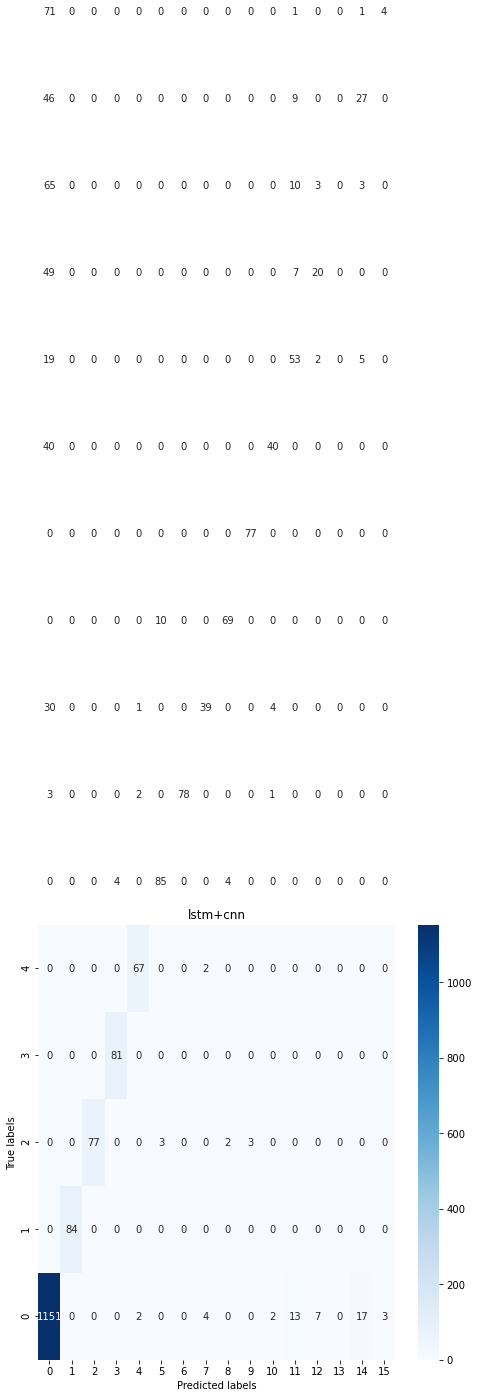

In [175]:
Y_pred = model.predict(test_x)
Y_pred = np.argmax(Y_pred, axis=1)
    # # 绘制混淆矩阵
plotHeatMap(test_y, Y_pred)

# 3.3 cnn网络

In [129]:
def buildModel_cnn():
    newModel = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(7200, 7)),
        # 第一个卷积层, 4 个 21x1 卷积核
        tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=2, padding='SAME', activation='relu'),
        tf.keras.layers.AveragePooling1D(pool_size=1, strides=2, padding='SAME'),
        # 第一个池化层, 最大池化,4 个 3x1 卷积核, 步长为 2
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=0.2),
        # 全连接层,5 个节点
        tf.keras.layers.Dense(16, activation='softmax')
    ])
    return newModel

In [130]:
log_dir_cnn="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_cnn = buildModel_cnn()
model_cnn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
# 定义TensorBoard对象
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# 训练与验证
model_cnn.fit(train_x, train_y, epochs=20,
                batch_size=32,
                callbacks=[tensorboard_callback])
x = model.output_shape
print(x)

Epoch 1/20


ValueError: in user code:

    /Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        replication_mode=InputReplicationMode.PER_WORKER):
    /Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        1: <tf.Variable 'Variable/replica_1:0' shape=() dtype=float32, numpy=2.0>
    /Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        @property
    /Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        to scalar coefficients.
    /Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        keras_tensor.keras_tensor_from_tensor, outputs)
    /Users/pro/Documents/anaconda3/anaconda3/envs/tensorflow1-x/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        list_inputs = []

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [32, 7]


In [40]:
Y_pred = model_cnn.predict(test_x)
Y_pred = np.argmax(Y_pred, axis=1)
    # # 绘制混淆矩阵
plotHeatMap(test_y, Y_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'output_shape'

## 3.4 LSTM层 

In [226]:
def buildModel_LSTM():
    newModel = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(7, 1)),
        # 第一个卷积层, 4 个 21x1 卷积核
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=0.2),
        # 全连接层,5 个节点
        tf.keras.layers.Dense(16, activation='softmax')
    ])
    return newModel

In [227]:
log_dir_cnn="logs_LSTM/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_LSTM = buildModel_LSTM()
model_LSTM.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
# 定义TensorBoard对象
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# 训练与验证
model_cnn.fit(train_x, train_y, epochs=200,
                batch_size=32,
                callbacks=[tensorboard_callback])

Epoch 1/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8722
Epoch 2/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8729
Epoch 3/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8687
Epoch 4/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8699
Epoch 5/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8715
Epoch 6/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8701
Epoch 7/200
225/225 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8708
Epoch 8/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8726
Epoch 9/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8732
Epoch 10/200
225/225 [==============================] - 0s 2ms/step - loss: 0.3788 - accura

225/225 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9019
Epoch 161/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.9051
Epoch 162/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.9015
Epoch 163/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9003
Epoch 164/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.9028
Epoch 165/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.9050
Epoch 166/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.9040
Epoch 167/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.9024
Epoch 168/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.9033
Epoch 169/200
225/225 [==============================] - 0s 2ms/step - loss: 0.2761 - a

# 4 胶囊网络层

## 4.1 胶囊层 

In [6]:
class CapsLayer(object):
    ''' Capsule layer 类别参数有：
        Args:
            input: 一个4维张量[batchsize, row, cel,filters][128,none,430,64]
            num_outputs: 当前层的Capsule单元数量
            vec_len: 一个Capsule输出向量的长度
            layer_type: 选择'FC' 或 "CONV", 以确定是用全连接层还是卷积层
            with_routing: 当前Capsule是否从较低层级中Routing而得出输出向量

        Returns:
            一个四维张量
        '''
    def __init__(self, num_outputs, vec_len, with_routing=True, layer_type='FC'):
        # 当前层的胶囊数量
        self.num_outputs = num_outputs
        # 胶囊长度
        self.vec_len = vec_len
        # 是否进行动态路由
        self.with_routing = with_routing
        # 层的类型
        self.layer_type = layer_type

    def __call__(self, input, kernel_size=None, stride=None):
        '''
        当“Layer_type”选择的是“CONV”，将使用 'kernel_size' 和 'stride'
        '''
        capsules = []
        if self.layer_type == 'CONV':
            self.kernel_size = kernel_size
            self.stride = stride
            
            # 不进行动态路由
            if not self.with_routing:
                # 第一层卷积
                # 输入，胶囊数量*胶囊长度，卷机核大小，卷积步长
                capsules = tf.contrib.layers.conv1d(input, self.num_outputs * self.vec_len, self.kernel_size, self.stride, padding="VALID",
                 activation_fn=tf.nn.relu)
                print("第二次一维卷积维数：",capsules.get_shape())
                capsules = tf.reshape(capsules, (capsules.shape[0], -1, self.vec_len,1))
                # 进行压缩
                capsules = squash(capsules)

                # assert capsules.get_shape() == [cfg.batch_size, 1152, 8, 1]
                return (capsules)

        # the PrimaryCaps layer, a convolutional layer
        # 全连接层
        if self.layer_type == 'FC':
            if self.with_routing:
                print("FC.input: ",input)
                self.input = tf.reshape(input, shape=(input.shape[0], -1, 1, input.shape[-2].value, 1))
                print("FC_input 维数：",self.input.shape)
                # 动态路由
                with tf.variable_scope('routing'):
                    b_IJ = tf.constant(
                        np.zeros([cfg.batch_size, input.shape[1].value, self.num_outputs, 1, 1], dtype=np.float32))
                    print("b_ij:",b_IJ.shape)
                    capsules = routing(self.input, b_IJ)
                    capsules = tf.squeeze(capsules, axis=1)

            return(capsules)

## 4.2 动态路由层 

In [7]:
def routing(input, b_IJ):
    print("dynamic routing!!!!!!")
    # W: [num_caps_i, num_caps_j, len_u_i, len_v_j]
    ###############################################
    W = tf.get_variable('Weight', shape=(1, input.shape[1], 5, 8, 8), dtype=tf.float32,
                        initializer=tf.random_normal_initializer(stddev=cfg.stddev))
    # W = tf.get_variable('Weight', shape=(1, input.shape[1], 2, 8, 8), dtype=tf.float32,
    #                     initializer=tf.random_normal_initializer(stddev=cfg.stddev))
    print("W的维数:",W.shape)
    # Eq.2, calc u_hat
    # do tiling for input and W before matmul
    # input => [batch_size, 1152, 10, 8, 1]
    # W => [batch_size, 1152, 10, 8, 16]
    ######################################
    input = tf.tile(input, [1, 1, 5, 1, 1])
    # input = tf.tile(input, [1, 1, 2, 1, 1])
    a_i = tf.sqrt(tf.reduce_sum(tf.square(input), axis=-2, keep_dims=True))
    a_i = tf.nn.softmax(a_i, axis=2)
    print("a_i: ", a_i.shape)
    print("扩维的输入维数：", input.shape)
    W = tf.tile(W, [cfg.batch_size,1, 1, 1, 1])
    print("W最终维数：",W.shape)
    u_hat = tf.matmul(W, input, transpose_a=True)
    # assert u_hat.get_shape() == [cfg.batch_size, 1152, 10, 16, 1]
    print("u的维数：",u_hat.shape)
    # In forward, u_hat_stopped = u_hat; in backward, no gradient passed back from u_hat_stopped to u_hat
    u_hat_stopped = tf.stop_gradient(u_hat, name='stop_gradient')
    ##########################################
    # s_J = tf.reduce_mean(u_hat_stopped, axis=2, keep_dims=True)
    # print("未循环s_J: ", s_J.shape)
    # b_IJ = tf.reduce_sum(tf.square(tf.subtract(u_hat_stopped, s_J)), axis=1, keep_dims=True)
    # print("未循环b_IJ: ", b_IJ.shape)
    # line 3,for r iterations do
    for r_iter in range(cfg.iter_routing):
        with tf.variable_scope('iter_' + str(r_iter)):
            # line 4:
            # => [batch_size, 1152, 10, 1, 1]
            # #########################method 1 :leaky_softmax######################
            # leak = tf.zeros_like(b_IJ, optimize=True)
            # print("leak1",leak.shape)
            # leak = tf.reduce_sum(leak, axis=2, keep_dims=True)
            # print("leak2",leak.shape)
            #
            # leaky_logits = tf.concat([leak, b_IJ], axis=2)
            # print("leaky_logits",leaky_logits.shape)
            #
            # leaky_routing = tf.nn.softmax(leaky_logits, axis=2)
            # print("leak_routing",leaky_routing.shape)
            # #####################
            # c_IJ = tf.split(leaky_routing, [1, 5], axis=2)[1]
            # c_IJ = c_IJ*a_i
            ##########################METHOD 2#####################################################
            # b_IJ = tf.multiply(b_IJ,a_i)
            # a_i = tf.nn.softmax(a_i,axis=2)
            # print("softmax_ai:",a_i.shape)
            c_IJ = tf.nn.softmax(b_IJ, dim=2)*a_i
            # print("C_IJ:", c_IJ.shape)
            # c_IJ = tf.multiply(c_IJ,a_i)
            # print("C_ij: ",c_IJ.shape)
            #########################METHOD 3 KMEANS_ROUTING#########################################
            # b_IJ = tf.reduce_sum(tf.square(tf.subtract(u_hat_stopped, s_J)), axis=1, keep_dims=True)
            # print("循环b_IJ: ", b_IJ.shape)
            # c_IJ = tf.nn.sigmoid(b_IJ)
            # print("sigmoid_C_ij: ", c_IJ.shape)
            # At last iteration, use `u_hat` in order to receive gradients from the following graph
            if r_iter == cfg.iter_routing - 1:
                # line 5:
                # weighting u_hat with c_IJ, element-wise in the last two dims
                # => [batch_size, 1152, 10, 16, 1]
                s_J = tf.multiply(c_IJ, u_hat)
                print("multi_s_J:",s_J.shape)
                # then sum in the second dim, resulting in [batch_size, 1, 10, 16, 1]
                s_J = tf.reduce_sum(s_J, axis=1, keep_dims=True)
                # assert s_J.get_shape() == [cfg.batch_size, 1, 10, 16, 1]
                print("最后一次循环s_J的维数：", s_J.shape)
                # line 6:
                # squash using Eq.1,
                v_J = squash(s_J)
                # assert v_J.get_shape() == [cfg.batch_size, 1, 10, 16, 1]
            elif r_iter < cfg.iter_routing - 1:  # Inner iterations, do not apply backpropagation
                s_J = tf.multiply(c_IJ, u_hat_stopped)
                print("multi_s_J:",s_J.shape)
                s_J = tf.reduce_sum(s_J, axis=1, keep_dims=True)
                print("循环s_J的维数：",s_J.shape)
                v_J = squash(s_J)

                # line 7:
                # reshape & tile v_j from [batch_size ,1, 10, 16, 1] to [batch_size, 1152, 10, 16, 1]
                # then matmul in the last tow dim: [16, 1].T x [16, 1] => [1, 1], reduce mean in the
                # batch_size dim, resulting in [1, 1152, 10, 1, 1]

                v_J_tiled = tf.tile(v_J, [1, input.shape[1], 1, 1, 1])
                print("v的维数：",v_J_tiled.shape)
                u_produce_v = tf.matmul(u_hat_stopped, v_J_tiled, transpose_a=True)

                # assert u_produce_v.get_shape() == [cfg.batch_size, 1152, 10, 1, 1]
                # b_IJ += tf.reduce_sum(u_produce_v, axis=0, keep_dims=True)

                b_IJ += u_produce_v

    return(v_J)

## 4.3 压缩函数 

In [8]:
def squash(vector):
    '''Squashing function corresponding to Eq. 1
    Args:
        vector: A tensor with shape [batch_size, 1, num_caps, vec_len, 1] or [batch_size, num_caps, vec_len, 1].
    Returns:
        A tensor with the same shape as vector but squashed in 'vec_len' dimension.
    '''
    ###########method1 squansh function
    vec_squared_norm = tf.reduce_sum(tf.square(vector), -2, keep_dims=True)
    scalar_factor = vec_squared_norm / (1 + vec_squared_norm) / tf.sqrt(vec_squared_norm + epsilon)
    vec_squashed = scalar_factor * vector  # element wise
    #############method2 strong squansh function#############
    # vec_squared_norm_a = tf.reduce_sum(tf.square(vector), -2, keep_dims=True)
    # vec_squared_norm_b = tf.sqrt(vec_squared_norm_a + epsilon)
    # scalar_factor = vec_squared_norm_a/vec_squared_norm_b
    # vec_squashed = scalar_factor*vector


    return(vec_squashed)

In [21]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms

USE_CUDA = True

In [26]:
class Mnist:
    def __init__(self, batch_size):
        dataset_transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])

        train_dataset = datasets.MNIST('../data', train=True, download=True, transform=dataset_transform)
        test_dataset = datasets.MNIST('../data', train=False, download=True, transform=dataset_transform)
        
        self.train_loader  = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)        

In [22]:
class ConvLayer(nn.Module):
    # 输入通道是1，输出是256
    def __init__(self, in_channels=1, out_channels=256, kernel_size=9):
        super(ConvLayer, self).__init__()

        self.conv = nn.Conv2d(in_channels=in_channels,
                               out_channels=out_channels,
                               kernel_size=kernel_size,
                               stride=1
                             )

    def forward(self, x):
        return F.relu(self.conv(x))

In [33]:
# 子胶囊层
class PrimaryCaps(nn.Module):
    # num_capsules为胶囊的个数
    def __init__(self, num_capsules=8, in_channels=256, out_channels=32, kernel_size=9):
        super(PrimaryCaps, self).__init__()

        self.capsules = nn.ModuleList([
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=2, padding=0) 
                          for _ in range(num_capsules)])
    
    # 前向传播
    def forward(self, x):
        u = [capsule(x) for capsule in self.capsules]
        print('(1)u:',u)
        u = torch.stack(u, dim=1)
        print('(2)u:',u)
        u = u.view(x.size(0), 32 * 6 * 6, -1)
        print('(3)u:',u)
        # 压缩函数
        return self.squash(u)
    
    def squash(self, input_tensor):
        squared_norm = (input_tensor ** 2).sum(-1, keepdim=True)
        output_tensor = squared_norm *  input_tensor / ((1. + squared_norm) * torch.sqrt(squared_norm))
        return output_tensor

In [23]:
conv_layer = ConvLayer()

In [24]:
conv_layer

ConvLayer(
  (conv): Conv2d(1, 256, kernel_size=(9, 9), stride=(1, 1))
)

In [ ]:
primary_capsules.forward(trainX)

In [34]:
primary_capsules = PrimaryCaps()

In [68]:
trainX = torch.from_numpy(train_x)

In [69]:
trainX

tensor([[ 1.1818, -0.6700, -1.1313,  ..., -0.2504,  0.5615, -0.3558],
        [ 1.1818, -0.1246,  0.0916,  ..., -0.3684, -2.2146, -0.5004],
        [-1.3010,  1.4026, -0.8595,  ..., -0.3684,  0.1099, -0.5004],
        ...,
        [-0.0596,  1.5116, -0.9954,  ..., -0.3291,  0.5787, -0.4281],
        [ 1.1818,  1.5116,  0.0916,  ..., -0.3684, -0.0072, -0.5004],
        [-0.0596,  1.1844,  1.4503,  ..., -0.3684,  0.5721, -0.4281]],
       dtype=torch.float64)

In [70]:
primary_capsules.forward(trainX)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 256, 9, 9], but got 2-dimensional input of size [7200, 7] instead